<a href="https://colab.research.google.com/github/Abhishek1236/deep-learning-model/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Lstm for prediction of stock price predictions
# data preprocessing 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [0]:
#importing the training set 
dataset_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
#creating the numpy array
training_set = dataset_train.iloc[:,1:2].values

In [8]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [0]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
scaled_training_set = sc.fit_transform(training_set)

In [10]:
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [0]:
#Creating a datastructure with 60 timesteps and 1 output 
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i, 0])
  
x_train, y_train = np.array(x_train),np.array(y_train)

In [16]:
print(x_train.shape[0])
print(x_train.shape[1])

1198
60


In [0]:
#reshaping 
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [18]:
x_train.shape

(1198, 60, 1)

In [0]:
#building the RNN
#importing the libraries 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
#initialising the rnn
regressor = Sequential()

In [0]:
# adding the first lstm layers and some dropout regularisation
regressor.add(LSTM(units =50,return_sequences= True,input_shape= (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [0]:
#second lstm layer
regressor.add(LSTM(units =50,return_sequences= True))
regressor.add(Dropout(0.2))
# third lstm layer
regressor.add(LSTM(units =50,return_sequences= True))
regressor.add(Dropout(0.2))
# fourth lstm layer
regressor.add(LSTM(units =50,return_sequences= False))
regressor.add(Dropout(0.2))


In [0]:
# adding the output layer
regressor.add(Dense(units = 1))

In [0]:
#compiling the rnn 
regressor.compile(optimizer = "adam",loss = "mean_squared_error")

In [26]:
#fitting the rnn model to the training set 
regressor.fit(x_train,y_train,epochs=100,batch_size=32,use_multiprocessing= True)

Epoch 1/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0384
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0067
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

In [0]:
#getting the real stock price
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
#getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [0]:
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])
 # y_train.append(scaled_training_set[i, 0])
  
x_test = np.array(x_test)

In [0]:
#reshaping 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [0]:
# prediction 
predicted_stock_price =  regressor.predict(x_test)

In [0]:
#inverse scaling of prediction
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

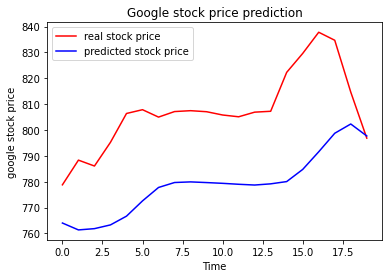

In [33]:
#visualising the result
plt.plot(real_stock_price,color = 'red',label = 'real stock price')
plt.plot(predicted_stock_price,color = 'blue',label = 'predicted stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('google stock price')
plt.legend()
plt.show()